## Bullish on Broadway:  Fun Graphs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime


In [2]:
index = pd.read_csv('index.csv')

In [3]:
index = index.set_index('ID')

In [5]:
df = pd.read_csv('ibdb.csv', sep=',', encoding='latin-1')

In [6]:
def fill_nulls(data):
    data['GrossChange'] = data['GrossChange'].fillna(0)
    data['AttChange'] = data['AttChange'].fillna(0)
    data['TopTicket'] = data['TopTicket'].fillna(data['AvgTicket'])
    return data

df = fill_nulls(df)

In [7]:
df = df.dropna()

In [8]:
df['Week'] = pd.to_datetime(df.Week)

# Potential Capacity vs.  Attendance for Entire Run 

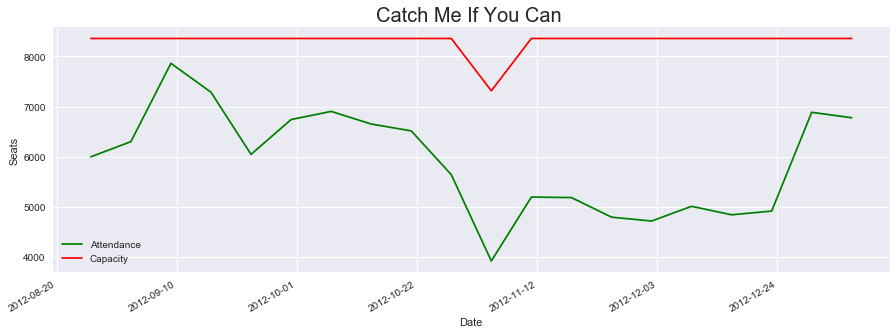

In [21]:
def graph_attendance(show):
    x = df.loc[df.ID == show, :]
    x = x.set_index('Week')
    fig, ax = plt.subplots(figsize=[15,5])
    fig.autofmt_xdate()
    plt.plot(x.index, x.Attendance, color='green', label='Attendance')
    plt.plot(x.index, x.Capacity, color='red', label='Capacity')
    plt.title(index.Show[show], size =20)
    plt.xlabel('Date')
    plt.ylabel('Seats')
    plt.legend()

graph_attendance(88)

# Potential Revenue vs. Gross Revenue for Entire Run

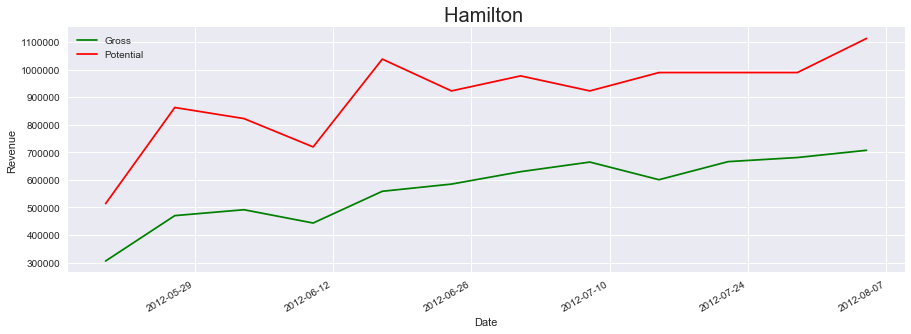

In [35]:
def graph_gross(show):
    x = df.loc[df.ID == show, :]
    x = x.set_index('Week')
    fig, ax = plt.subplots(figsize=[15,5])
    fig.autofmt_xdate()
    plt.plot(x.index, x.Gross, color='green', label='Gross')
    plt.plot(x.index, x.Potential, color='red', label='Potential')
    plt.title(index.Show[show], size=20)
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.legend()

graph_gross(177)

# Average Ticket vs. Premium Top Ticket for Entire Run

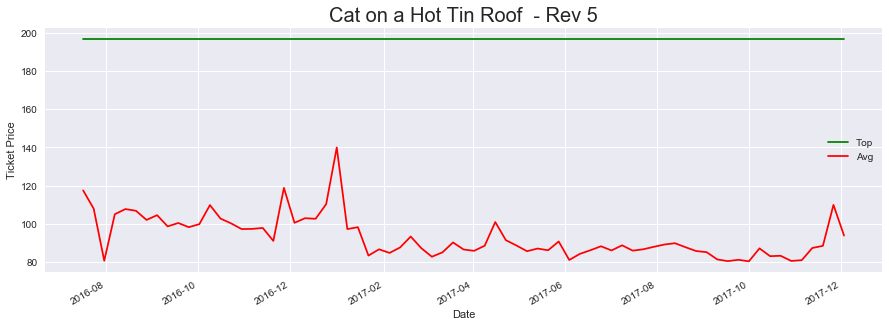

In [25]:
def graph_gross(show):
    x = df.loc[df.ID == show, :]
    x = x.set_index('Week')
    fig, ax = plt.subplots(figsize=[15,5])
    fig.autofmt_xdate()
    plt.plot(x.index, x.TopTicket, color='green', label='Top')
    plt.plot(x.index, x.AvgTicket, color='red', label='Avg')
    plt.title(index.Show[show], size=20)
    plt.xlabel('Date')
    plt.ylabel('Ticket Price')
    plt.legend()

graph_gross(87)